In [1]:
import cv2
import os
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
from PIL import Image
def receive_frames(video_path, counter):
    output_folder = 'EGOR_Frames'
    
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1
        frame_name = f'frame_{counter}_{frame_count}.jpg'
        cv2.imwrite(os.path.join(output_folder, frame_name), frame)
    
    cap.release()
    #cv2.destroyAllWindows()
    return

In [2]:
os.listdir('EGOR')

['video_EGOR_11.mp4',
 'video_EGOR_14.mp4',
 'video_EGOR_17.mp4',
 'video_EGOR_10.mp4',
 'video_EGOR_7.mp4',
 'video_EGOR_16.mp4',
 'video_EGOR_19.mp4',
 'video_EGOR_9.mp4',
 'video_EGOR_12.mp4',
 'video_EGOR_18.mp4',
 'video_EGOR_15.mp4']

In [4]:
import os
path_my_dir = 'EGOR'
file_count = 0

for filename in os.listdir(path_my_dir):
    if filename.endswith('.mp4'):
        os.rename('EGOR/' + filename, 'EGOR/' + f'video_EGOR_{file_count}.mp4')
        file_count += 1

In [5]:
import pandas as pd
df_frames = pd.DataFrame(columns = ['file_name', 'labels'])

In [16]:
counter = 1
for filename in os.listdir(path_my_dir):
    receive_frames('EGOR/' + filename, counter)
    counter += 1

In [10]:
import os
image_dir = 'EGOR_Frames'
image_files = os.listdir(image_dir)
new_rows = []
for image_file in image_files:
        file_name = os.path.basename(image_file)
        if file_name not in df_frames['file_name'].values:
            new_row = {'file_name': file_name, 'labels': 0}
            new_rows.append({'file_name': file_name, 'labels': 0})
df_frames = pd.concat([df_frames, pd.DataFrame(new_rows)], ignore_index=True)

In [11]:
df_frames

,file_name,labels
0,frame_20_605.jpg,0
1,frame_7_92.jpg,0
2,frame_18_1191.jpg,0
3,frame_17_89.jpg,0
4,frame_18_2198.jpg,0
...,...,...
9194,frame_18_1669.jpg,0
9195,frame_12_320.jpg,0
9196,frame_19_154.jpg,0
9197,frame_18_2212.jpg,0


In [12]:
df_frames_shoplifting = df_frames

In [29]:
def set_label_df_frames(number_video, start_frame, finish_frame, label):
    for i in range(start_frame, finish_frame + 1):
        df_frames.loc[df_frames['file_name'] == f"frame_{number_video}_{i}.jpg", 'labels'] = label
        
def set_label_df_frames_shoplifting(number_video, start_frame, finish_frame):
    for i in range(start_frame, finish_frame + 1):
        df_frames_shoplifting.loc[df_frames['file_name'] == f"frame_{number_video}_{i}.jpg", 'labels'] = 1

In [30]:
labels_encode = {
    'other action': 0,
    'pickup item': 1,
    'maintain item ': 2,
    'put item in pocket/coat/bag etc': 3          
}

In [115]:
set_label_df_frames(20, 362, 434, 3)
df_frames.to_csv('metadata.csv', index=False)

<Axes: ylabel='Frequency'>

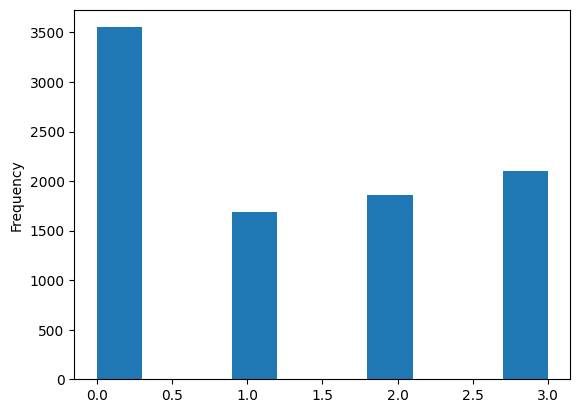

In [116]:
df_frames['labels'].plot(kind='hist')

In [3]:
ls

EGOR/  egor.csv  EGOR_Frames/  Egor.zip  github/  myself_dataset_labeling.ipynb


In [7]:
import pandas as pd
df_frames = pd.read_csv('egor.csv')
df_frames

,file_name,labels
0,frame_20_605.jpg,0
1,frame_7_92.jpg,0
2,frame_18_1191.jpg,3
3,frame_17_89.jpg,0
4,frame_18_2198.jpg,0
...,...,...
9194,frame_18_1669.jpg,2
9195,frame_12_320.jpg,1
9196,frame_19_154.jpg,2
9197,frame_18_2212.jpg,0


In [9]:
df_frames_two_classes = df_frames
df_frames_two_classes

,file_name,labels
0,frame_20_605.jpg,0
1,frame_7_92.jpg,0
2,frame_18_1191.jpg,3
3,frame_17_89.jpg,0
4,frame_18_2198.jpg,0
...,...,...
9194,frame_18_1669.jpg,2
9195,frame_12_320.jpg,1
9196,frame_19_154.jpg,2
9197,frame_18_2212.jpg,0


In [14]:
df_frames_two_classes[df_frames_two_classes['labels'] == 1] = 1
df_frames_two_classes[df_frames_two_classes['labels'] == 3] = 1
df_frames_two_classes[df_frames_two_classes['labels'] == 2] = 0

<Axes: ylabel='Frequency'>

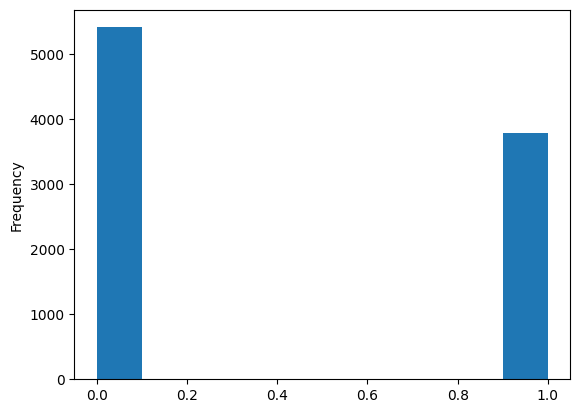

In [15]:
df_frames_two_classes['labels'].plot(kind='hist')